## Nonparametric statistics. Exam.

### N1


In [187]:
library(carData)
data(Prestige)
df  <-  Prestige
head(df)

,education,income,women,prestige,census,type
,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof
physicists,15.64,11030,5.13,77.6,2113,prof


#### Tests

##### Compute the Kendall correlation coefficients between the variable ”prestige” and all other variables. 
Test the hypothesis of independence using exact distribution of the corresponding statistics. 

In [188]:
### cor.test without exact distribution
for (i in 1:3) {
print(cor.test(df[, i], df$prestige, method="kendall", exact = FALSE))
}


	Kendall's rank correlation tau

data:  df[, i] and df$prestige
z = 9.3196, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
     tau 
0.626799 


	Kendall's rank correlation tau

data:  df[, i] and df$prestige
z = 8.4057, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5651247 


	Kendall's rank correlation tau

data:  df[, i] and df$prestige
z = -0.78366, p-value = 0.4332
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.05273399 



If
the calculation of the exact distribution is not possible, make the
appropriate changes in the database (e.g., delete repeated and/or
missing values).

In [189]:
df <- na.omit(df)
df <- df[-which(duplicated(df[, 1])),]
df <- df[-which(duplicated(df[, 2])),]
df <- df[-which(duplicated(df[, 3])),]
df <- df[-which(duplicated(df[, 4])),]

In [192]:
### test with exaxt
for (i in 1:3) {
  print(cor.test(df[, i], df$prestige, method="kendall", exact = TRUE))
}


	Kendall's rank correlation tau

data:  df[, i] and df$prestige
T = 2439, p-value = 2.753e-14
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.6671224 


	Kendall's rank correlation tau

data:  df[, i] and df$prestige
T = 2285, p-value = 3.642e-14
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5618592 


	Kendall's rank correlation tau

data:  df[, i] and df$prestige
T = 1292, p-value = 0.134
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1168831 



Tau is significant for pairs prestige - education and prestige - income.

##### Divide all occupations into 2 groups: with percentage of women less than 50 (”male jobs”) and more than 50 (”female jobs”).
Using nonparametric test, check the hypothesis that the incomes
in these two groups follow the same distribution.

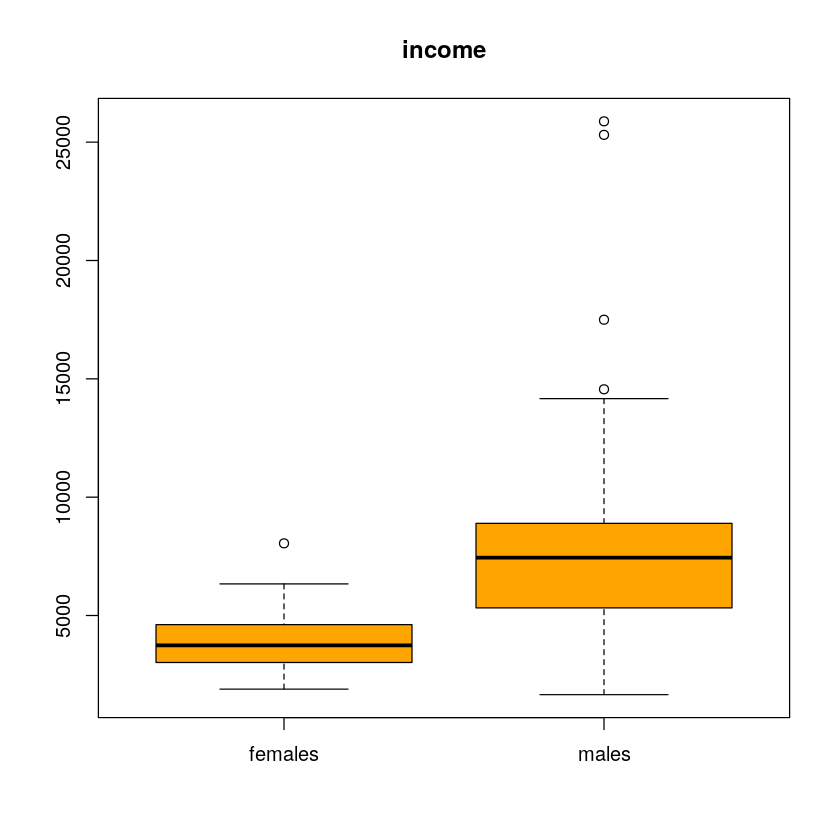

In [195]:
gen <-  rep(0, length(df$women))
gen[which(df$women > 50)] = 2
gen[which(df$women < 50)] = 1
df$gg <- gen # add column to dataframe

f_jobs <- df$income[df$gg == 2] 
m_jobs <- df$income[df$gg == 1]

boxplot(f_jobs, m_jobs, col="orange",
        main = "income",
        names = c("females", "males"))

In [197]:
wilcox.test(f_jobs, m_jobs, exact = FALSE, 
            alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  f_jobs and m_jobs
W = 173, p-value = 1
alternative hypothesis: true location shift is greater than 0


According to Mann-Whitney-wilcoxon test to compare groups
H0 rejected, i.e. there is evidence for hypothesis that
income in "male" jobs higher than that in "female" jobs

##### For each occupation from the first group, find an occupation in the second group with the closest value of the variable ”education”.
Using nonparametric test, check the hypothesis that the incomes
in these two groups (”male jobs” and ”female jobs” for persons
with similar education) follow the same distribution.

In [203]:
new <- rep(NA, length(df$education))

for (i in 1:length(df$education)) {
    new[i] <- df[which(abs(df[i, 1] - df[, 1]) == min(abs(df[i, 
        1] - df[-i, 1]))), 2]
}

fem_paired <- new[which(df$gg == 1)]

Warning message in new[i] <- df[which(abs(df[i, 1] - df[, 1]) == min(abs(df[i, 1] - :
“number of items to replace is not a multiple of replacement length”

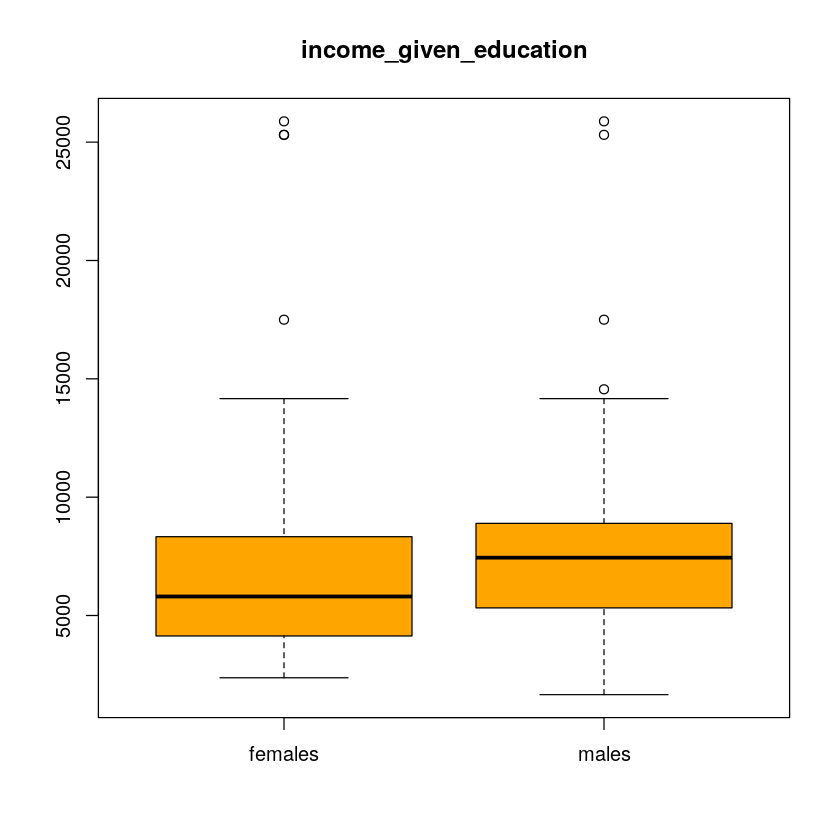

In [205]:
### test location shift
boxplot(fem_paired, m_jobs, col = "orange", main = "income_given_education", 
    names = c("females", "males"))

In [ ]:
### test for location shift
wilcox.test(fem_paired, m_jobs, paired = TRUE, conf.int = TRUE, alternative = "greater")

H0 still rejected

#### Regression
The aim of this exercise is to analyse whether the prestige
of a job can be better explained by the level of income or by the level
of education.

##### Prepare the data for construction of regression dependences between ”prestige” and ”income”:

- find the outliers of the variable ”income”, delete the corresponding observations from the data;

In [168]:
df  <- df[-which(df[['income']]%in%boxplot.stats(df[['income']])$out), ]
x  <- df$income
y  <-  df$prestige

- find the average ”prestige” between the observations with the same ”income”.
Further analysis should be provided with these new data.

In [169]:
x1_un  <-  unique(x)
y_un <-  sapply(unique(x), function(z){ mean(y[which(x==z)])})

##### Fit the supsmu (Super Smoother) model describing the dependence between ”prestige” (as y-variable) and ”income” (as x-variable). 
Construct the estimators under various choices of span
parameter (0.05, 0.2, 0.5, cross-validation). Find the best model
in the sense that the mean-squared error is minimal.

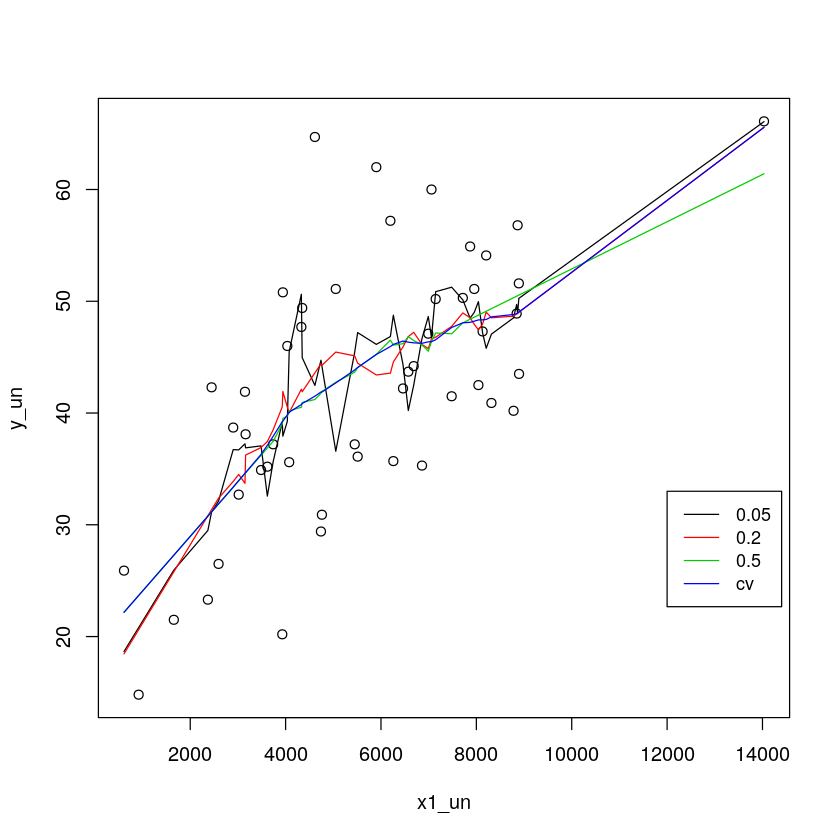

In [160]:
plot(x1_un, y_un)
spanvec <- c(0.05, 0.2, 0.5, "cv")
for (j in (1:4)) {
    lines(supsmu(x1_un, y_un, span = spanvec[j]), col = j)
}
legend(12000, 33, legend=spanvec, col=seq(spanvec), lty=1, cex=0.9)

In [161]:
mse_span  <- c()
res  <-  rep(0, length(x1_un))
for (j in 1:4) {
    S  <-  supsmu(x1_un, y_un, span = spanvec[j])
    for (k in (1:length(x1_un))) {
        res[k]  <-  S$y[which(S$x == x1_un[k])]
    }
    mse_span <- c(mse_span, mean((res - y_un)^2))
}
# mse_span
which.min(mse_span)


[1] 4

Best model is with $span=0.05$

#####  For the same variables, fit the kernel regression under various choices of kernels (Gaussian, Epanechnikov), and various methods for bandwidth selection (Akaike criterion, least-squares cross-validation).
Find the best model in the sense that the mean-
squared error is minimal.

[1] 1 1
[1] 119.5785
[1] 1 2
[1] 117.1121


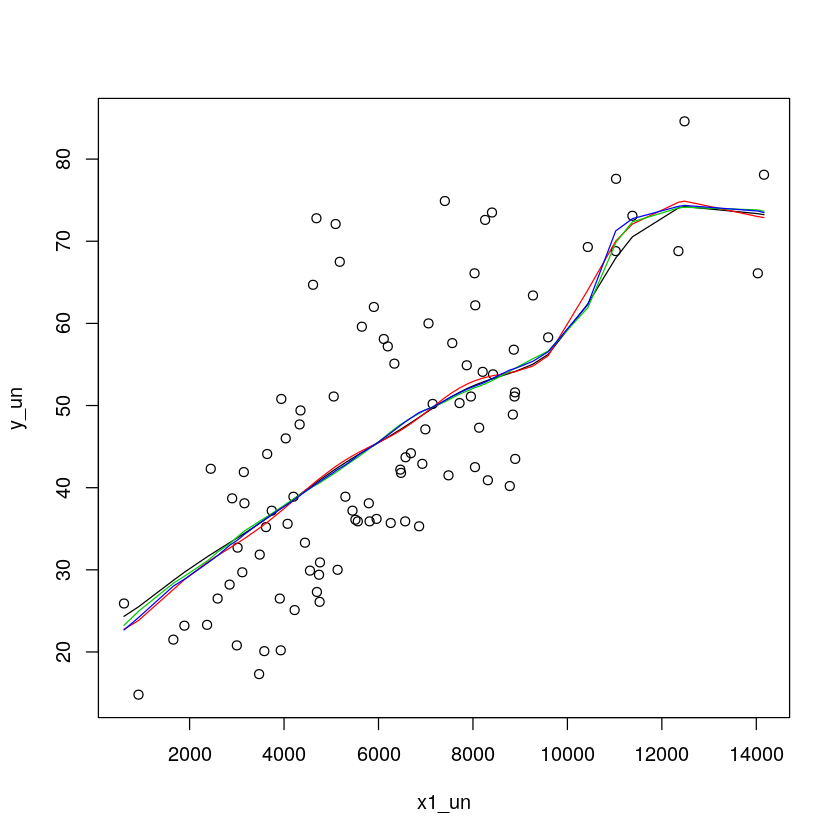

In [170]:
library(np)
ker = c("gaussian", "epanechnikov")
bw = c("cv.aic", "cv.ls")
plot(x1_un, y_un)
res = 1000
color = 1
for (i in (1:2)) {
    for (j in (1:2)) {
        model = npreg(txdat = x1_un, tydat = y_un, ckertype = ker[i], bwmethod = bw[j])
        result <- data.frame(cbind(y_un, fitted(model), x1_un))
        result <- result[order(x1_un), ]
        with(result, points(x1_un, V2, type = "l", col = color))
        color = color + 1
        mse = mean((fitted(model) - y_un)^2)
        if (mse < res) {
            res = mse
            print(c(i, j))
            print(res)
        }
    }
}

minimal MSE:

In [148]:
res

[1] 117.1121

In [149]:
ker[1]

[1] "gaussian"

In [150]:
bw[2]

[1] "cv.ls"

Best moldel in terms of MSE: Gaussian kernel with Least-Squares Cross-Validation

##### For the same variables, fit the projection estimates to the basis of Legendre polynomials with the number of basis functions varying from 1 to 3. 
Find the best model in the sense that the mean-squared error is minimal.

In [163]:
library('orthopolynom')

In [171]:
A  <-  min(x1_un)
B  <-  max(x1_un)
y_un  <- y_un[order(x1_un)]
x1_un  <-  sort(x1_un)
x1_un_2   <-  2*(x1_un-A)/(B-A) - 1

[1]  392.2685  708.7581 1073.7502

[1] 1

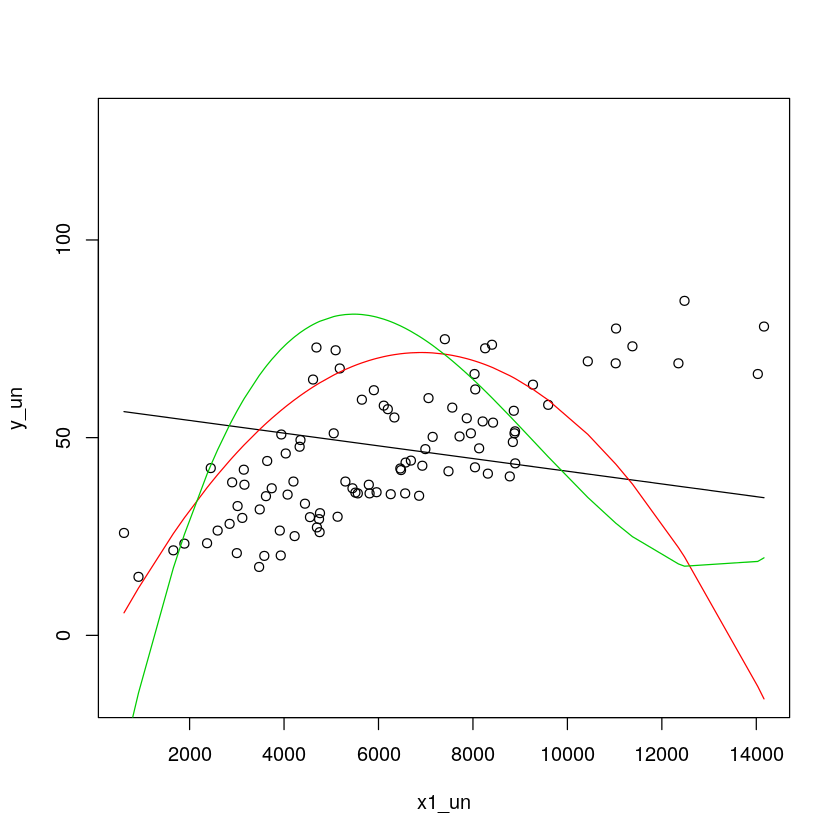

In [172]:
plot(x1_un,y_un, ylim=c(-15, 130))
mse  <- c()
for (J in 1:3){
    LP  <-  legendre.polynomials(J, normalized = T)
    leg  <-  matrix(unlist(polynomial.values(polynomials = LP, x = x1_un_2)), ncol=J+1, byrow=F)
    coef  <-  colMeans(leg*y_un)
    res  <-  2*leg%*%coef
    lines(x1_un, res, col=J)
    mse <- c(mse, mean((res-y_un)^2))
}
mse
which.min(mse)

##### Prepare the data for construction of regression dependences between ”prestige” and ”education”:

- select the ”middle-class” of occupations in terms of education:
find the occupations with ”education” lying between 0.25 and
0.75 quantiles of this variable;

In [173]:
df  <-  Prestige
q1  <- quantile(df[['education']],0.25) 
q2  <- quantile(df[['education']],0.75)
df  <- df[df['education']<q2, ]
df  <- df[df['education']>q1, ]

- find the average ”prestige” between the observations with the
same ”education”.
Further analysis should be provided with these new data.

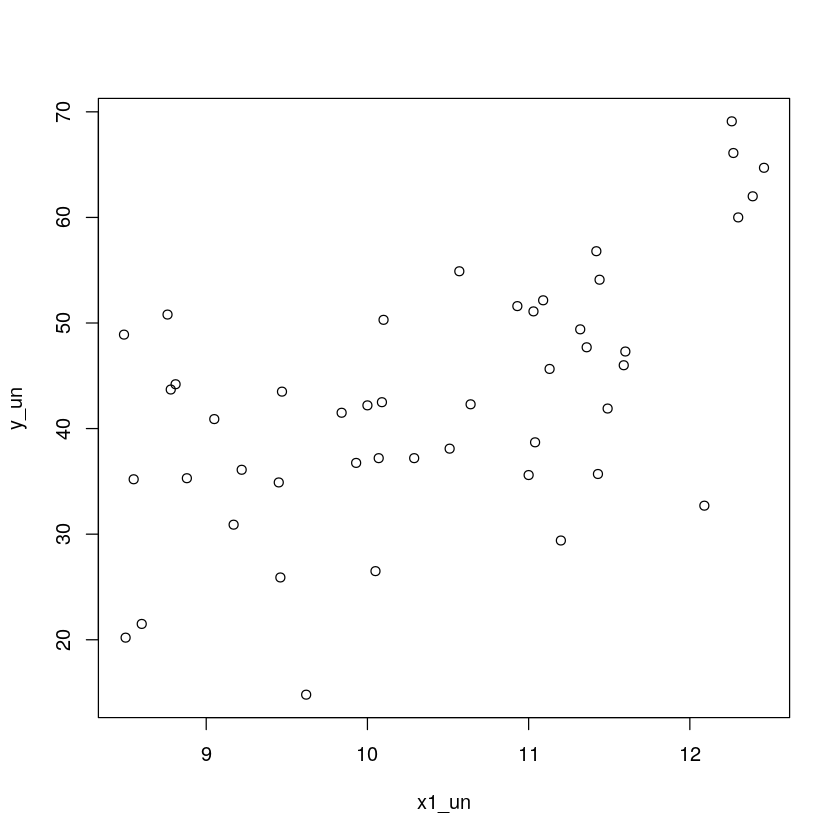

In [174]:
x  <- df$education
y  <-  df$prestige
x1_un  <-  unique(x)
y_un <-  sapply(unique(x), function(z){ mean(y[which(x==z)])})
plot(x1_un, y_un)

#####  Provide the steps (ii)-(iv) for the variables ”prestige” and ”education”.

###### supsmu

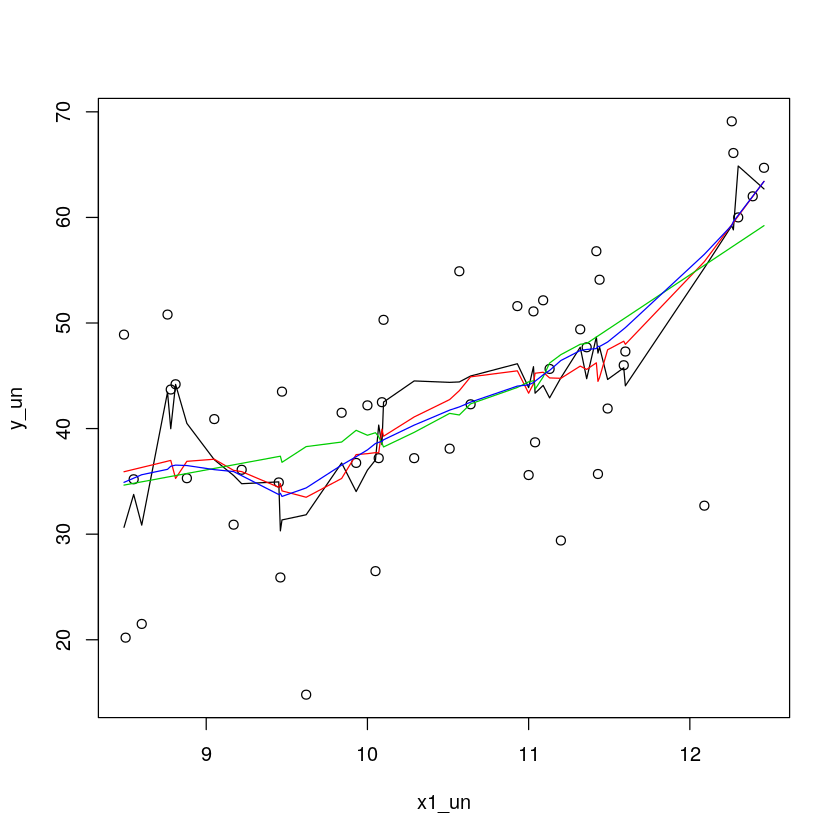

In [175]:
plot(x1_un, y_un)
spanvec <- c(0.05, 0.2, 0.5, "cv")
for (j in (1:4)) {
    lines(supsmu(x1_un, y_un, span = spanvec[j]), col = j)
}
legend(12000, 33, legend=spanvec, col=seq(spanvec), lty=1, cex=0.9)

In [176]:
mse_span  <- c()
res  <-  rep(0, length(x1_un))
for (j in 1:4) {
    S  <-  supsmu(x1_un, y_un, span = spanvec[j])
    for (k in (1:length(x1_un))) {
        res[k]  <-  S$y[which(S$x == x1_un[k])]
    }
    mse_span <- c(mse_span, mean((res - y_un)^2))
}
# mse_span
which.min(mse_span)


[1] 1

######  kernel regression

[1] 1 1
[1] 79.7146
[1] 1 2
[1] 78.76156
[1] 2 1
[1] 78.35755
[1] 2 2
[1] 78.19726


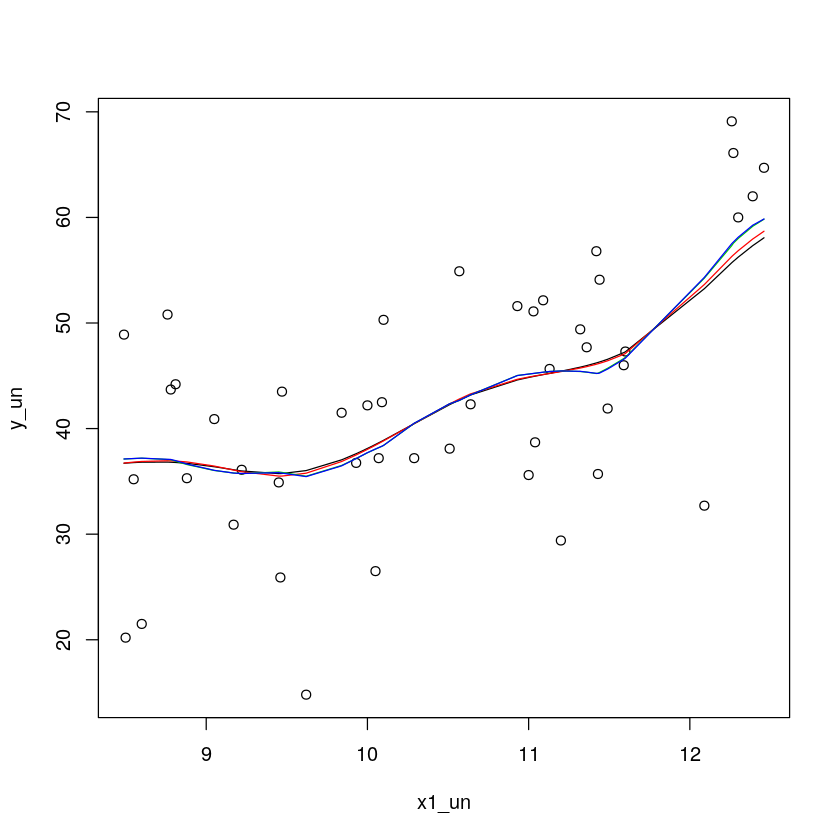

In [177]:
ker = c("gaussian", "epanechnikov")
bw = c("cv.aic", "cv.ls")
plot(x1_un, y_un)
res = 1000
color = 1
for (i in (1:2)) {
    for (j in (1:2)) {
        model = npreg(txdat = x1_un, tydat = y_un, ckertype = ker[i], bwmethod = bw[j])
        result <- data.frame(cbind(y_un, fitted(model), x1_un))
        result <- result[order(x1_un), ]
        with(result, points(x1_un, V2, type = "l", col = color))
        color = color + 1
        mse = mean((fitted(model) - y_un)^2)
        if (mse < res) {
            res = mse
            print(c(i, j))
            print(res)
        }
    }
}

minimal MSE

In [178]:
res

[1] 78.19726

In [179]:
ker[2]

[1] "epanechnikov"

In [180]:
bw[2]

[1] "cv.ls"

Best moldel in terms of MSE: Epanechnikov kernel with Least-Squares Cross-Validation

###### legendre

In [181]:
A  <-  min(x1_un)
B  <-  max(x1_un)
y_un  <- y_un[order(x1_un)]
x1_un  <-  sort(x1_un)
x1_un_2   <-  2*(x1_un-A)/(B-A) - 1

[1] 1

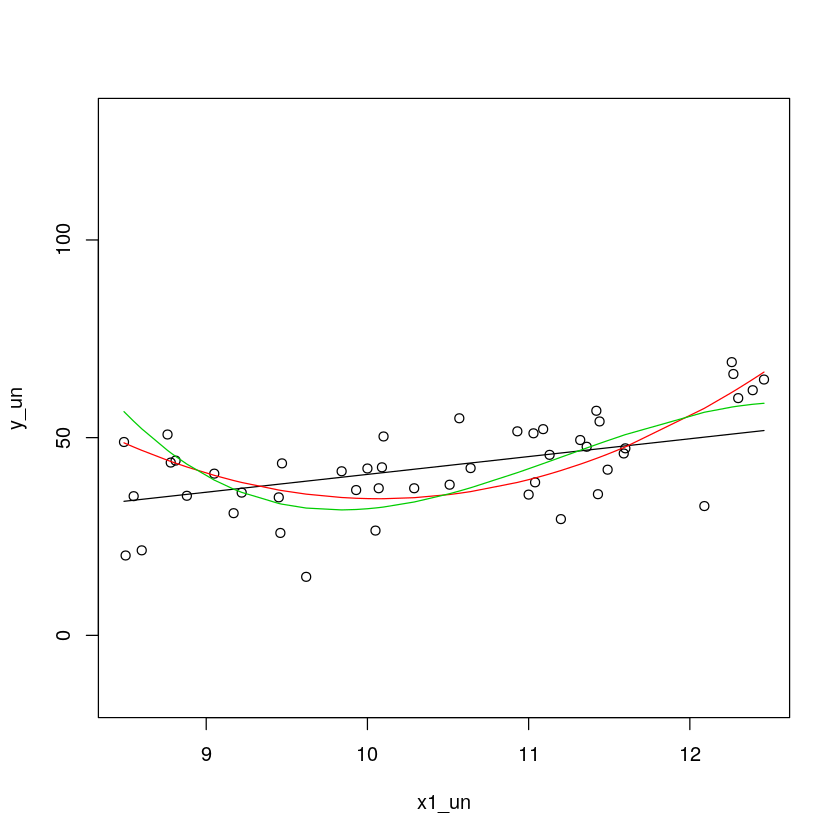

In [182]:
plot(x1_un,y_un, ylim=c(-15, 130))
mse  <- c()
for (J in 1:3){
    LP  <-  legendre.polynomials(J, normalized = T)
    leg  <-  matrix(unlist(polynomial.values(polynomials = LP, x = x1_un_2)), ncol=J+1, byrow=F)
    coef  <-  colMeans(leg*y_un)
    res  <-  2*leg%*%coef
    lines(x1_un, res, col=J)
    mse <- c(mse, mean((res-y_un)^2))
}
which.min(mse)

#####  Compare the results obtained on previous steps.

In terms of MSE prestige can be better explained by education. 

Considering Legendre polinomials linear fit is still the best in terms of MSE, however for the pair prestige-education the observations are spread out equally therefore the projection estimates behave more adequately.